# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

heroes_df.head()
#powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
del heroes_df['Unnamed: 0']
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [5]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




mean       43.855191
median     62.000000
std       130.823733
min       -99.000000
max       900.000000
Name: Weight, dtype: float64


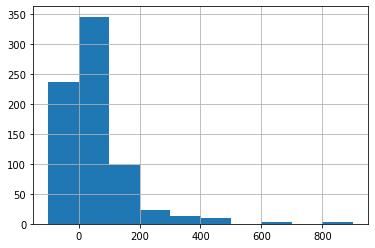

In [6]:
# First I'll deal with the missing weight values as they're numerical and it will be more straightforward. 
print(heroes_df['Weight'].agg(['mean', 'median', 'std', 'min', 'max']))
heroes_df['Weight'].hist()

In [7]:
no_weight_data = heroes_df[heroes_df['Weight'].isnull()]
no_weight_data
# I'll fill these with median data because it's more central in the histogram and would skew the data least.

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [8]:
mean_weight = heroes_df['Weight'].mean()
heroes_df['Weight'].fillna(mean_weight, inplace=True)

heroes_df.isna().sum() # check to ensure fill worked

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [9]:
heroes_df['Publisher'].value_counts(normalize=True) # using this to make a loop to probabalistically assign the missing values

Marvel Comics        0.539638
DC Comics            0.299026
NBC - Heroes         0.026426
Dark Horse Comics    0.025035
George Lucas         0.019471
Image Comics         0.019471
Star Trek            0.008345
HarperCollins        0.008345
SyFy                 0.006954
Team Epic TV         0.006954
IDW Publishing       0.005563
ABC Studios          0.005563
Icon Comics          0.005563
Shueisha             0.005563
Wildstorm            0.004172
Sony Pictures        0.002782
Universal Studios    0.001391
Titan Books          0.001391
Microsoft            0.001391
Rebellion            0.001391
South Park           0.001391
J. K. Rowling        0.001391
Hanna-Barbera        0.001391
J. R. R. Tolkien     0.001391
Name: Publisher, dtype: float64

In [10]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [11]:
rel_prob = [.539, .299, .026, .025, .019] # top 5 publishers relative probability
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_publisher(value):
    if value == '':
        return np.random.choice(['Marvel Comics', 'DC Comics', 'NBC - Heroes', 'Dark Horse Comics', 'Image Comics'], p=prob)
    else:
        return value
heroes_df.Publisher = heroes_df.Publisher.map(lambda x: impute_publisher(x))
heroes_df.Publisher.value_counts()

# function not working to replace...Will leave publisher data empty, not super important for modeling and it's not a large set.

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
ABC Studios            4
Icon Comics            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
Titan Books            1
Microsoft              1
Rebellion              1
South Park             1
J. K. Rowling          1
Hanna-Barbera          1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [12]:
heroes_df.Publisher.isnull().sum()

15

In [13]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [14]:
no_publish_data = heroes_df[heroes_df['Publisher'].isnull()]
no_publish_data

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.000000
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.000000
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.000000
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.000000
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.000000
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.000000
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.000000
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,43.855191
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.000000
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.000000


In [15]:
powers_df.isna().any().any()

False

In [16]:
heroes_df.drop_duplicates(subset='name', inplace=True)

heroes_df.reset_index(drop=True, inplace=True)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [17]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [19]:
powers_df = powers_df.astype('str')

In [20]:
# set the index for both DFs to be 'name', join them using an 'inner' so only
# what is found within both DFs is joined. 
superheroes_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
superheroes_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

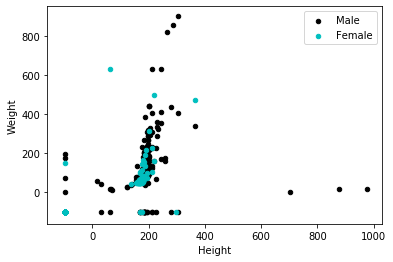

In [21]:
male_superheroes_df = superheroes_df[superheroes_df['Gender'] == 'Male']
female_superheroes_df = superheroes_df[superheroes_df['Gender'] == 'Female']

ax = male_superheroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_superheroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [22]:
male_superheroes_df = superheroes_df[superheroes_df['Gender'] == 'Male']
female_superheroes_df = superheroes_df[superheroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

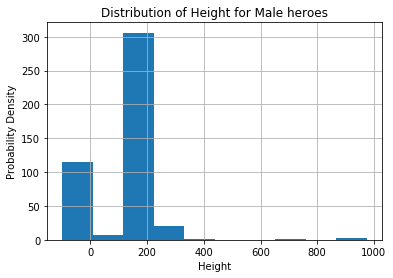

In [23]:
# Male Height
show_distplot(male_superheroes_df, 'Male', 'Height')

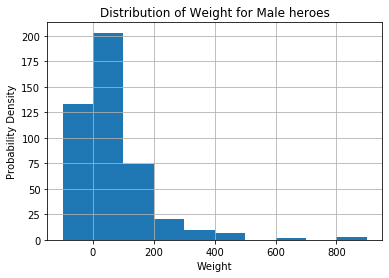

In [24]:
# Male Weight
show_distplot(male_superheroes_df, 'Male', 'Weight')

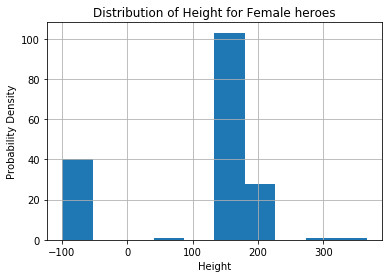

In [26]:
# Female Height
show_distplot(female_superheroes_df, 'Female', 'Height')

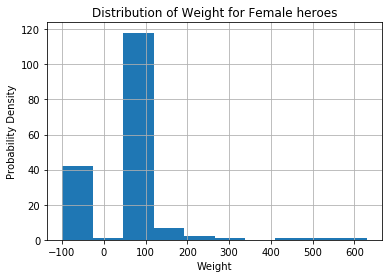

In [27]:
# Female Weight
show_distplot(female_superheroes_df, 'Female', 'Weight')

In [28]:
print('Mean height for male heroes: {}'.format(male_superheroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_superheroes_df.Height.median()))
print('Mean weight for male heroes: {}'.format(male_superheroes_df.Weight.mean()))
print('Median weight for male heroes: {}'.format(male_superheroes_df.Weight.median()))
print('Mean height for female heroes: {}'.format(female_superheroes_df.Height.mean()))
print('Median height for female heroes: {}'.format(female_superheroes_df.Height.median()))
print('Mean weight for female heroes: {}'.format(female_superheroes_df.Weight.mean()))
print('Median weight for female heroes: {}'.format(male_superheroes_df.Weight.median()))

Mean height for male heroes: 118.42699115044248
Median height for male heroes: 183.0
Mean weight for male heroes: 60.391272547028386
Median weight for male heroes: 79.0
Mean height for female heroes: 111.9396551724138
Median height for female heroes: 168.0
Mean weight for female heroes: 37.05747126436781
Median weight for female heroes: 79.0


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

For both male and female superheroes, the mean height and weights are lower than the medians. There seems to be a lot of entries in the database that are -99, which leads me to believe there's some missing/incorrect data. It would probably be best in this situation to use the middle 75% of the data or to remove the negative values. 

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [31]:
# find the top 5 most common powers here
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1) # drops all non-superpower-related columns
    columns = df.columns.values 
    for col in columns: # loops through all columns of superpowers and "tallies" up which ones are True. 
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum()) # create a dict to store the values our function adds up
    # line below returns the dict items with the highest counts and only the top 5, in decending order
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 

overall_top_5 = top_5_powers(superheroes_df)
print(overall_top_5)

[('Super Strength', 350), ('Stamina', 281), ('Durability', 251), ('Super Speed', 241), ('Agility', 235)]


In [32]:
# find the top 5 most common Marvel powers here
marvel_df = superheroes_df[superheroes_df['Publisher'] == 'Marvel Comics']

top_5_marvel = top_5_powers(marvel_df)
print(top_5_marvel)

[('Super Strength', 199), ('Durability', 148), ('Stamina', 145), ('Super Speed', 132), ('Agility', 121)]


In [33]:
# find the top 5 most common DC powers here
DC_df = superheroes_df[superheroes_df['Publisher'] == 'DC Comics']

top_5_DC = top_5_powers(DC_df)
print(top_5_DC)

[('Super Strength', 103), ('Flight', 83), ('Stamina', 83), ('Super Speed', 75), ('Agility', 68)]


<Figure size 432x288 with 0 Axes>

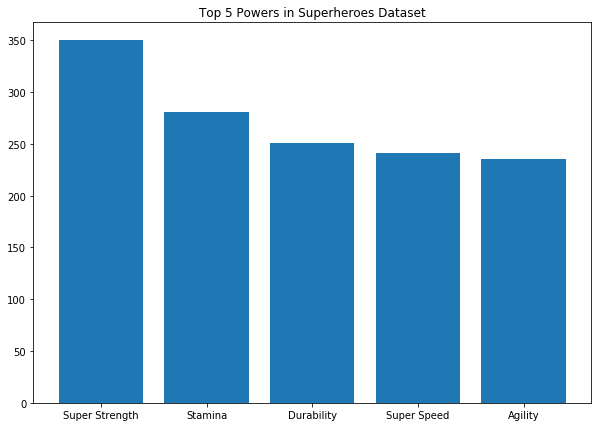

None

NameError: name 'dc_top_5' is not defined

In [34]:
# stolen from solution page, curious about this function and using its model in the future
def top_5_bar_chart(top_5_list, publisher=None):
    marvel_powers = [i[0] for i in top_5_list] # references dictionary to pull powers
    marvel_values = [i[1] for i in top_5_list] # references dictionary to pull values for aforementioned power

    plt.clf() # clears plot
    plt.figure(figsize=(10, 7)) # defines size
    bar_positions = np.arange(len(marvel_powers)) 
    plt.bar(bar_positions, marvel_values)
    plt.xticks(bar_positions, marvel_powers)
    if publisher:
        plt.title('Top 5 Powers in {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Powers in Superheroes Dataset')
    plt.show()

display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(dc_top_5, publisher='DC Comics'))
top_5_bar_chart(marvel_top_5, publisher='Marvel Comics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The top 5 powers within the Marvel and the DC universes are pretty comparable. The only difference is in DC, flight is the second most common superpower, whereas in Marvel the second most common superpower is Durability. Otherwise they're the same top 5. 

When compared to the whole set of superpowers, Marvel shares the same top 5 as the whole dataset, and just like the head to head comparison, DC only differs in flight being present in the top 5. 

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [ ]:
# find out if female superheroes have the super strength power as much as the male superheroes. 



## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data